<a href="https://colab.research.google.com/github/abee62/PCOS_Detection_Transfer_Learning/blob/main/PCOS_transfer_learning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from keras import optimizers
from keras.optimizers import rmsprop_v2
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
os.listdir('/content/drive/MyDrive/Dataset_PCOS/pcos_images5')
import glob
%matplotlib inline
from sklearn.utils import shuffle

In [ ]:
train_dir= "/content/drive/MyDrive/Dataset_PCOS/pcos_images5/train"
val_dir = "/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val"

train_infected_file = '/content/drive/MyDrive/Dataset_PCOS/pcos_images5/train/infected'
train_inf = glob.glob('/content/drive/MyDrive/Dataset_PCOS/pcos_images5/train/infected/*')

train_uninfected_file = '/content/drive/MyDrive/Dataset_PCOS/pcos_images5/train/uninfected'
train_uninf = glob.glob('/content/drive/MyDrive/Dataset_PCOS/pcos_images5/train/uninfected/*')

train_files = train_inf + train_uninf

val_infected_file = '/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val/infected'
val_inf = glob.glob('/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val/infected/*')

val_uninfected_file = '/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val/uninfected'
val_uninf = glob.glob('/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val/uninfected/*')

val_files = val_inf + val_uninf

In [ ]:
IMG_DIM = (256,256)
# train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
#print(train_imgs.shape)
# train_imgs = np.array(train_imgs)
# print(train_imgs.shape)
# val_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in val_files]
# val_imgs = np.array(val_imgs)

# train_imgs_scaled = train_imgs.astype('float32')
# val_imgs_scaled  = val_imgs.astype('float32')
# train_imgs_scaled /= 255
# val_imgs_scaled /= 255
# print(train_imgs[0].shape)
# array_to_img(train_imgs[0])

In [ ]:
# print(train_imgs.size)
# print(val_imgs.size)

In [ ]:
train_infected_imgs = [img_to_array(load_img(img,target_size=IMG_DIM))for img in train_inf]
train_uninfected_imgs = [img_to_array(load_img(img,target_size=IMG_DIM))for img in train_uninf]

val_infected_imgs = [img_to_array(load_img(img,target_size=IMG_DIM))for img in val_inf]
val_uninfected_imgs = [img_to_array(load_img(img,target_size=IMG_DIM))for img in val_uninf]

In [ ]:
print(len(train_infected_imgs))
print(len(train_uninfected_imgs))
print(len(val_infected_imgs))
print(len(val_uninfected_imgs))

624
624
156
156


## Samples of Uninfected ultrasound images of the Uterus 

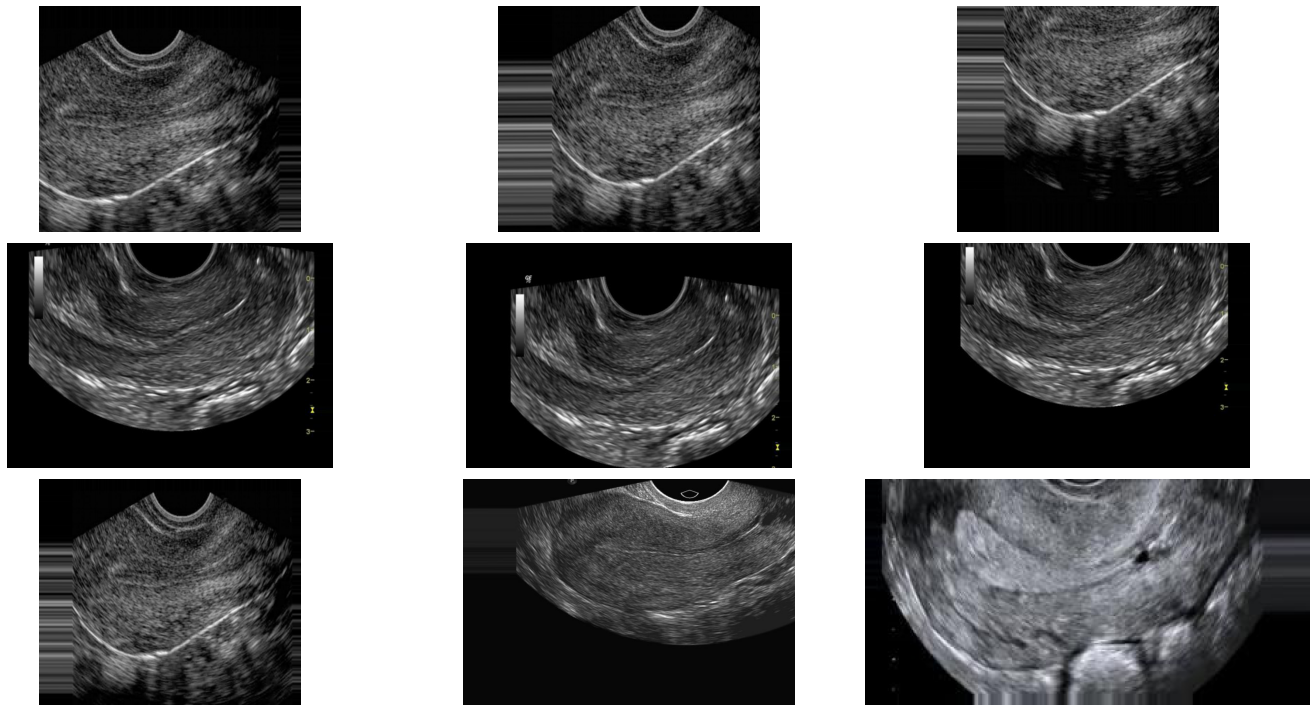

In [ ]:
uninfected = os.listdir("/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val/uninfected")
uninfected_dir = "/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val/uninfected"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(uninfected_dir, uninfected[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

## Samples of PCOS infected ultrasound images of the Uterus 

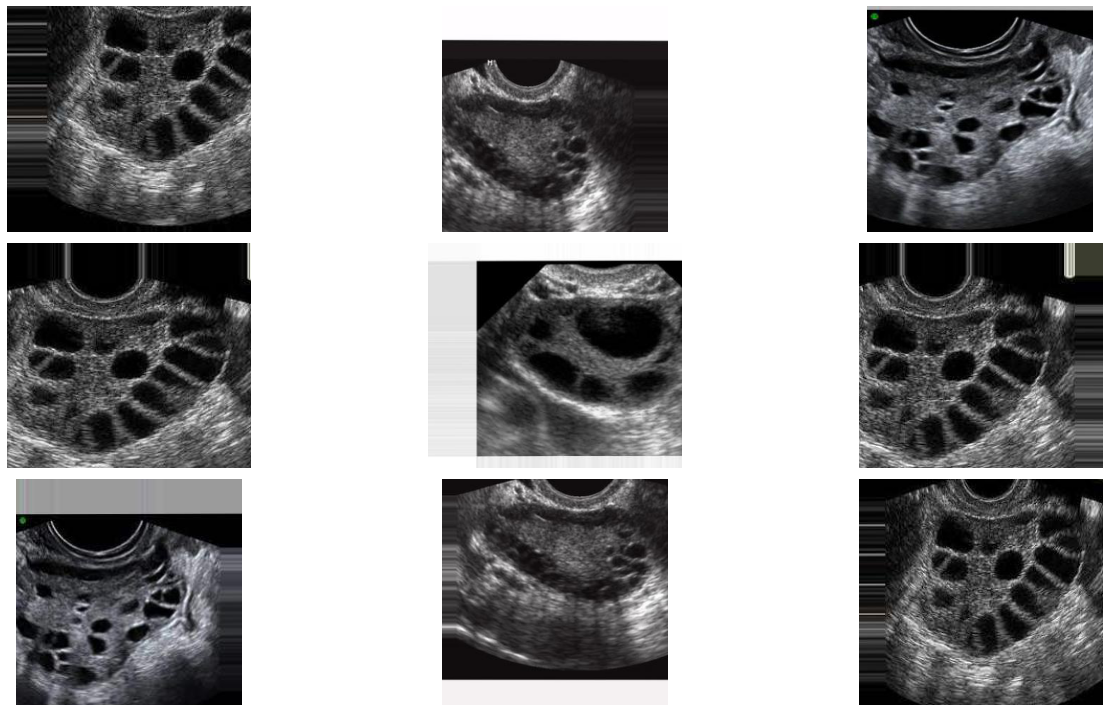

In [ ]:
infected = os.listdir("/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val/infected")
infected_dir = "/content/drive/MyDrive/Dataset_PCOS/pcos_images5/val/infected"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(infected_dir, infected[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

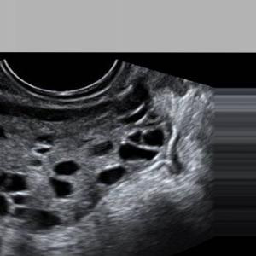

In [ ]:
array_to_img(train_infected_imgs[0])

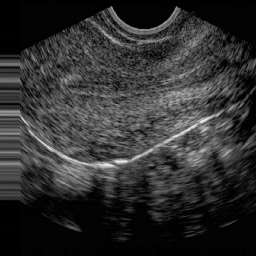

In [ ]:
array_to_img(train_uninfected_imgs[0])

In [ ]:
from sklearn.utils import shuffle

In [ ]:
train_labels = [1]*len(train_infected_imgs)+[0]*len(train_uninfected_imgs)
train_x = train_infected_imgs+train_uninfected_imgs

val_labels = [1]*len(val_infected_imgs)+[0]*len(val_uninfected_imgs)
val_x = val_infected_imgs + val_uninfected_imgs


In [ ]:
print(array_to_img(train_x[100]))
print(array_to_img(train_infected_imgs[100]))
print(train_labels[100])

<PIL.Image.Image image mode=RGB size=256x256 at 0x7F8990AA1AD0>
<PIL.Image.Image image mode=RGB size=256x256 at 0x7F8990AA1410>
1


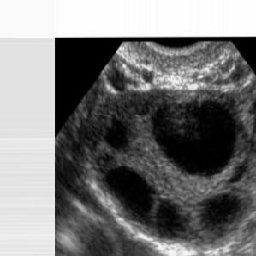

In [ ]:
array_to_img(train_x[100])

In [ ]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
val_labels_enc = le.transform(val_labels)

In [ ]:
#train_x = np.array(train_x)
#val_x = np.array(val_x)
train_imgs = train_x
# train_imgs = np.array(train_imgs)
# val_imgs = [val_x]
# val_imgs = np.array(val_imgs)
type(train_imgs)

list

In [ ]:
# train_imgs.shape

(1248, 256, 256, 3)

In [ ]:
# train_labels_enc.shape

(1248,)

(256, 256, 3)


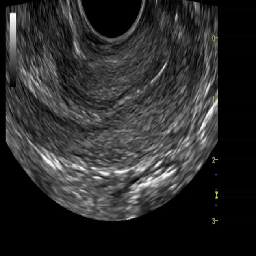

In [ ]:
train_imgs = train_x
val_imgs = val_x

train_imgs, train_labels_enc =shuffle(train_imgs,train_labels_enc,random_state=0)
val_imgs, val_labels_enc =shuffle(val_imgs,val_labels_enc,random_state=0)

train_imgs = np.array(train_imgs)
val_imgs = np.array(val_imgs)

train_imgs_scaled = train_imgs.astype('float32')
val_imgs_scaled  = val_imgs.astype('float32')
train_imgs_scaled /= 255
val_imgs_scaled /= 255


print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [ ]:
type(train_imgs)
train_imgs.shape

(1248, 256, 256, 3)

In [ ]:
input_shape = (256,256,3)

In [ ]:
print(train_imgs.size)
print(val_imgs.size)

245366784
61341696


CNN Model without Augmentation

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
epochs = 10
batch_size=10

In [ ]:
#x_train_shuffled,y_train_shuffled=shuffle(train_imgs_scaled,train_labels_enc,random_state=0)
#x_val_shuffled,y_val_shuffled=shuffle(val_imgs_scaled,val_labels_enc,random_state=0)

In [ ]:
#train_imgs_scaled = x_train_shuffled
#train_labels_enc = y_train_shuffled
#val_imgs_scaled - x_val_shuffled
#val_labels_enc = y_val_shuffled

In [ ]:
history = model_1.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(val_imgs_scaled, val_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
125/125 [==============================] - 24s 79ms/step - loss: 0.5774 - accuracy: 0.8894 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 8s 63ms/step - loss: 0.0569 - accuracy: 0.9928 - val_loss: 4.2864e-05 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 8s 63ms/step - loss: 0.1631 - accuracy: 0.9920 - val_loss: 3.6114e-05 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 8s 63ms/step - loss: 0.2632 - accuracy: 0.9896 - val_loss: 5.4512e-05 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 8s 63ms/step - loss: 0.0428 - accuracy: 0.9936 - val_loss: 0.0720 - val_accuracy: 0.9904
Epoch 6/10
125/125 [==============================] - 8s 64ms/step - loss: 0.1659 - accuracy: 0.9952 - val_loss: 4.6164e-05 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 8s 63ms/step - loss: 0.0856 - accuracy: 0.9960 - val_loss: 0.0029 - val

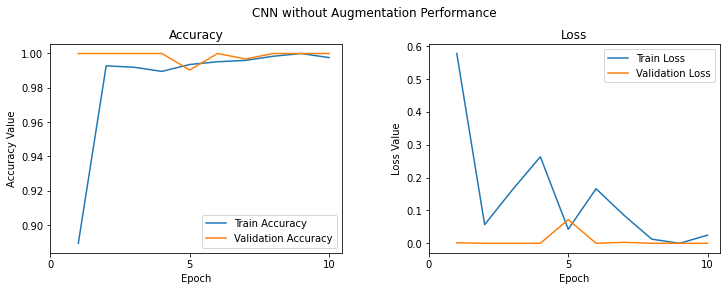

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN without Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

CNN Model with Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(val_imgs, val_labels_enc, batch_size=20)

Labels: [1, 1, 1, 1, 1]


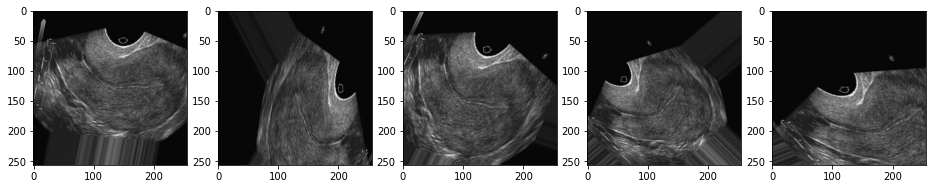

In [ ]:
img_id = 25
infected_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
infected = [next(infected_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in infected])
l = [ax[i].imshow(infected[i][0][0]) for i in range(0,5)]

Labels: [0, 0, 0, 0, 0]


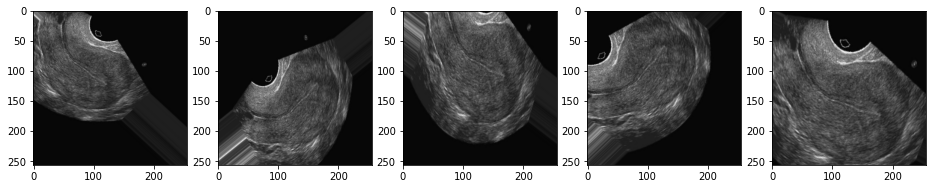

In [ ]:
img_id = 900
uninfected_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
uninfected = [next(uninfected_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in uninfected])
l = [ax[i].imshow(uninfected[i][0][0]) for i in range(0,5)]

In [ ]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(val_imgs, val_labels_enc, batch_size=20)

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history_2 = model_2.fit_generator(train_generator, steps_per_epoch=10, epochs=20,
                              validation_data=val_generator, validation_steps=5, 
                              verbose=1)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
10/10 [==============================] - 7s 518ms/step - loss: 0.6643 - accuracy: 0.5467 - val_loss: 0.6152 - val_accuracy: 0.8200
Epoch 2/20
10/10 [==============================] - 5s 500ms/step - loss: 0.5851 - accuracy: 0.6736 - val_loss: 0.4815 - val_accuracy: 0.8200
Epoch 3/20
10/10 [==============================] - 5s 473ms/step - loss: 0.5232 - accuracy: 0.7257 - val_loss: 0.2716 - val_accuracy: 0.9600
Epoch 4/20
10/10 [==============================] - 5s 491ms/step - loss: 0.4475 - accuracy: 0.7833 - val_loss: 0.1883 - val_accuracy: 0.9900
Epoch 5/20
10/10 [==============================] - 5s 490ms/step - loss: 0.3420 - accuracy: 0.8700 - val_loss: 0.1354 - val_accuracy: 0.9900
Epoch 6/20
10/10 [==============================] - 5s 478ms/step - loss: 0.3126 - accuracy: 0.8507 - val_loss: 0.1948 - val_accuracy: 0.9400
Epoch 7/20
10/10 [==============================] - 5s 493ms/step - loss: 0.2376 - accuracy: 0.8967 - val_loss: 0.0770 - val_accuracy: 0.9700
Epoch 

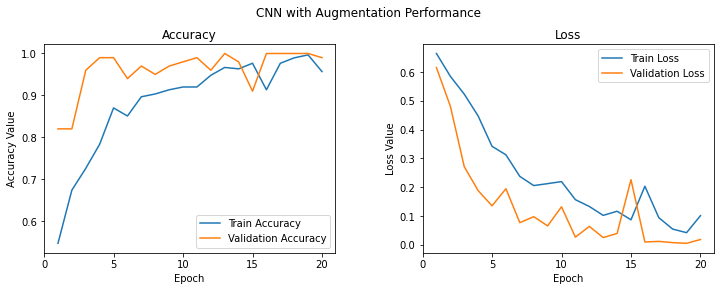

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,21))
ax1.plot(epoch_list, history_2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 21, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 21, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Using Transfer Learning

In [ ]:
from keras.applications import vgg16
from keras.models import Model

In [ ]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fa32d88bc90>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fa323c3f6d0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fa324009050>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fa32338c690>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fa323c69e10>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fa320203410>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fa325b4fc90>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fa3202154d0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fa320211990>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fa32020b350>,block3_conv3,False


(1, 8, 8, 512)


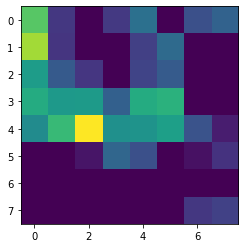

In [ ]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
val_features_vgg = get_bottleneck_features(vgg_model, val_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', val_features_vgg.shape)

Train Bottleneck Features: (1248, 32768) 	Validation Bottleneck Features: (312, 32768)


In [ ]:
from keras.layers import InputLayer
input_shape = vgg_model.output_shape[1]

model_3 = Sequential()
model_3.add(InputLayer(input_shape=(input_shape,)))
model_3.add(Dense(512, activation='relu', input_dim=input_shape))
model_3.add(Dropout(0.3))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               16777728  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 17,040,897
Trainable params: 17,040,897
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history_3 = model_3.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(val_features_vgg, val_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
125/125 [==============================] - 3s 20ms/step - loss: 0.0915 - accuracy: 0.9663 - val_loss: 1.0514e-04 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 2s 18ms/step - loss: 1.9626e-04 - accuracy: 1.0000 - val_loss: 3.5203e-07 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 2s 18ms/step - loss: 6.0872e-05 - accuracy: 1.0000 - val_loss: 1.4599e-08 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 2s 18ms/step - loss: 5.2556e-06 - accuracy: 1.0000 - val_loss: 1.4443e-08 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 2s 18ms/step - loss: 9.2223e-08 - accuracy: 1.0000 - val_loss: 3.3058e-10 - val_accuracy: 1.0000
Epoch 6/10
125/125 [==============================] - 2s 17ms/step - loss: 3.5466e-08 - accuracy: 1.0000 - val_loss: 4.7591e-10 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 2s 17ms/step - loss: 6.2853e-09 - accuracy: 

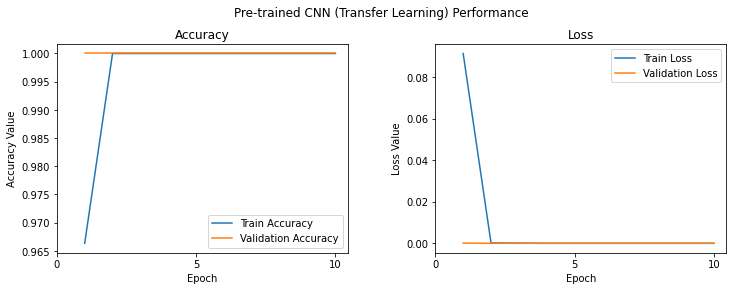

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history_3.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_3.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_3.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_3.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(val_imgs, val_labels_enc, batch_size=20)

In [ ]:
model_4 = Sequential()
model_4.add(vgg_model)
model_4.add(Dense(512, activation='relu', input_dim=input_shape))
model_4.add(Dropout(0.3))
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history_4 = model_4.fit_generator(train_generator, steps_per_epoch=10, epochs=10,
                              validation_data=val_generator, validation_steps=5, 
                              verbose=1)         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/10
10/10 [==============================] - 18s 1s/step - loss: 0.6375 - accuracy: 0.6267 - val_loss: 0.4599 - val_accuracy: 0.8500
Epoch 2/10
10/10 [==============================] - 7s 717ms/step - loss: 0.4729 - accuracy: 0.8133 - val_loss: 0.2895 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 7s 712ms/step - loss: 0.3932 - accuracy: 0.8633 - val_loss: 0.1964 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 7s 707ms/step - loss: 0.2832 - accuracy: 0.9367 - val_loss: 0.1418 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 10s 987ms/step - loss: 0.2280 - accuracy: 0.9653 - val_loss: 0.0976 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 7s 715ms/step - loss: 0.1798 - accuracy: 0.9667 - val_loss: 0.0826 - val_accuracy: 0.9900
Epoch 7/10
10/10 [==============================] - 7s 713ms/step - loss: 0.1489 - accuracy: 0.9667 - val_loss: 0.0438 - val_accuracy: 1.0000
Epoch 8

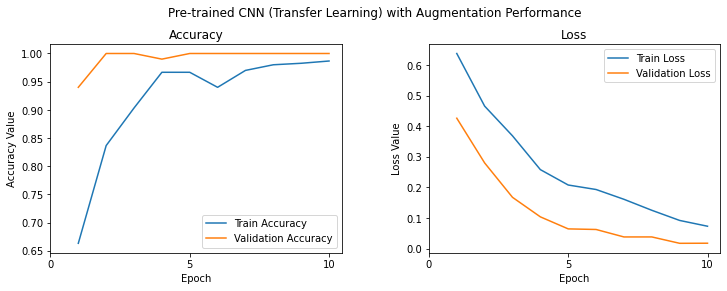

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history_4.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_4.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_4.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_4.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Pre-trained CNN model with Fine-tuning and Image Augmentation

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])     

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fa32d88bc90>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fa323c3f6d0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fa324009050>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fa32338c690>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fa323c69e10>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fa320203410>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fa325b4fc90>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fa3202154d0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fa320211990>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fa32020b350>,block3_conv3,False


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(val_imgs, val_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model_5 = Sequential()
model_5.add(vgg_model)
model_5.add(Dense(512, activation='relu', input_dim=input_shape))
model_5.add(Dropout(0.3))
model_5.add(Dense(512, activation='relu'))
model_5.add(Dropout(0.3))
model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history_5 = model_5.fit_generator(train_generator, steps_per_epoch=10, epochs=10,
                              validation_data=val_generator, validation_steps=2, 
                              verbose=1)  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
10/10 [==============================] - 11s 724ms/step - loss: 0.5699 - accuracy: 0.6933 - val_loss: 0.2290 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 7s 681ms/step - loss: 0.2628 - accuracy: 0.9400 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 7s 684ms/step - loss: 0.0881 - accuracy: 0.9933 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 7s 680ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 7s 730ms/step - loss: 0.0360 - accuracy: 0.9861 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 7s 677ms/step - loss: 0.0165 - accuracy: 0.9967 - val_loss: 4.4945e-04 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 7s 680ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 4.7274e-04 - val_accuracy: 1.00

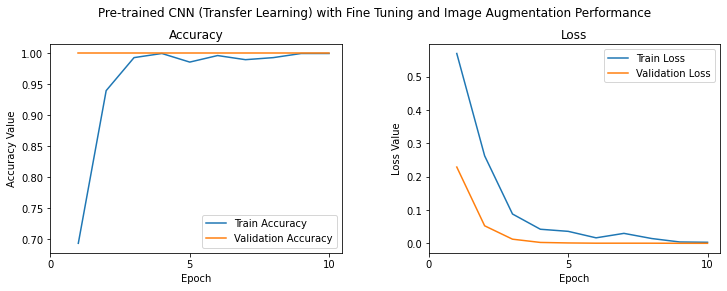

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine Tuning and Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history_5.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_5.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_5.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_5.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Pre-trained CNN model with Fine-tuning and Image Augmentation

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(val_imgs, val_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)  